In [2]:
%matplotlib ipympl

In [55]:
import sys
import os
import matplotlib.pyplot as plt
sys.path.append('..')
from eaggr_helper import *

### Elevation raster

In [58]:
raster = os.path.dirname(os.getcwd()) + r"\data\eesti_clipped\small_extent\MeritDEM90m.tif"

In [59]:
# create geojson extent
extentJSON = box(26.521263, 58.283163, 26.900083, 58.505180)

In [60]:
eaggr_el_20 = raster_to_eaggr_t(raster,'elevation', 400, 5000, extentJSON)

Start filling extent with eaggr indexes at resolution
Start getting raster values for eaggr cells at resolution


In [61]:
eaggr_el_20 = create_eaggr_geometry(eaggr_el_20)

In [62]:
eaggr_el_19 = cell_eaggr_t_downsampling(eaggr_el_20, 'cell_id', 'elevation', 19, 'numeric')
eaggr_el_19 = create_eaggr_geometry(eaggr_el_19)

In [63]:
eaggr_el_18 = cell_eaggr_t_downsampling(eaggr_el_19, 'cell_id', 'elevation', 18, 'numeric')
eaggr_el_18 = create_eaggr_geometry(eaggr_el_18)

In [64]:
eaggr_el_17 = cell_eaggr_t_downsampling(eaggr_el_18, 'cell_id', 'elevation', 17, 'numeric')
eaggr_el_17 = create_eaggr_geometry(eaggr_el_17)

In [62]:
fig, ax = plt.subplots(4,1,figsize=(7,18),sharex='col')
eaggr_el_20.plot(column='elevation',ax=ax[0])
eaggr_el_19.plot(column='elevation',ax=ax[1])
eaggr_el_18.plot(column='elevation',ax=ax[2])
eaggr_el_17.plot(column='elevation',ax=ax[3])
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

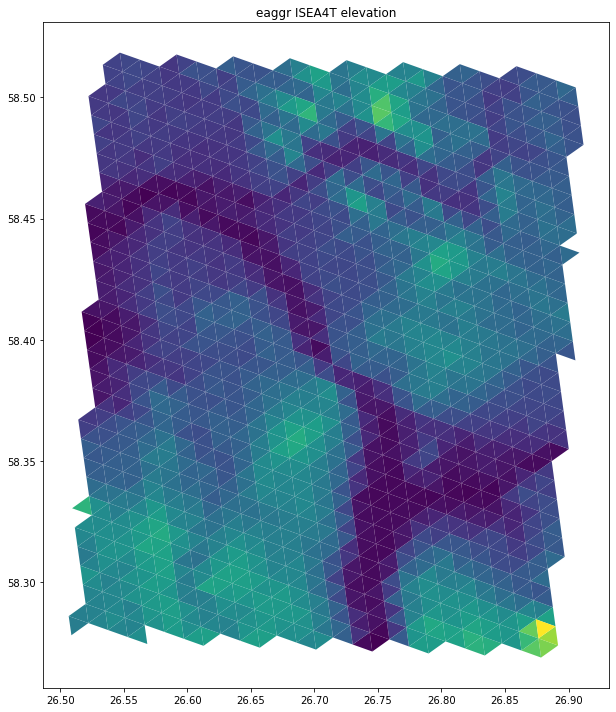

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
eaggr_el_17.plot(column='elevation',ax=ax)
ax.set_title('eaggr ISEA4T elevation')
plt.tight_layout()

### Corine vector

In [45]:
vector = os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\CorineEestiWGS84.gpkg'

In [44]:
corine_legend = pd.read_pickle(os.path.dirname(os.getcwd()) + r'\data\eesti_clipped\land_cover\corine_legend.pkl')

In [43]:
eaggr_cor_20 = vector_to_eaggr_t(vector,'code_18',400,5000,box(26.521263, 58.283163, 26.900083, 58.505180))

Start filling extent with eaggr indexes at resolution


In [46]:
eaggr_cor_20 = gpd.GeoDataFrame(eaggr_cor_20)
eaggr_cor_20 = create_eaggr_geometry(eaggr_cor_20)

In [47]:
eaggr_cor_19 = cell_eaggr_t_downsampling(eaggr_cor_20, 'cell_id', 'code_18', 19, 'categorical')
eaggr_cor_19 = create_eaggr_geometry(eaggr_cor_19)

In [48]:
eaggr_cor_18 = cell_eaggr_t_downsampling(eaggr_cor_19, 'cell_id', 'code_18', 18, 'categorical')
eaggr_cor_18 = create_eaggr_geometry(eaggr_cor_18)

In [49]:
eaggr_cor_17 = cell_eaggr_t_downsampling(eaggr_cor_18, 'cell_id', 'code_18', 17, 'categorical')
eaggr_cor_17 = create_eaggr_geometry(eaggr_cor_17)

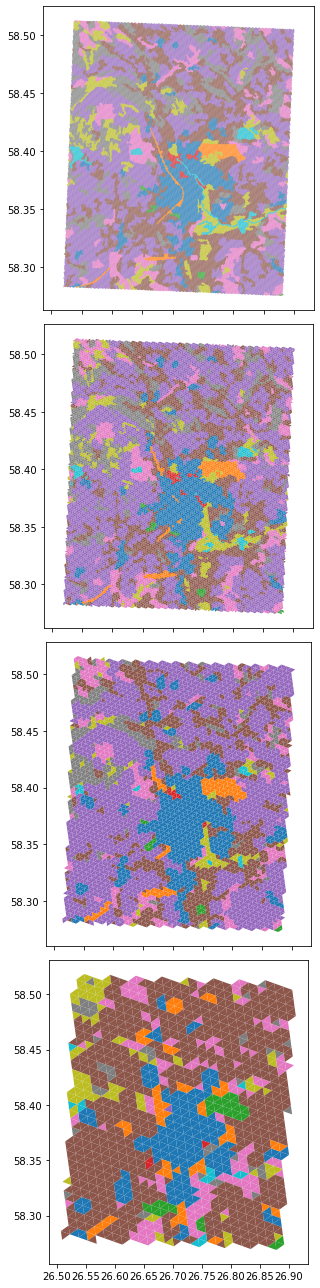

In [56]:
fig, ax = plt.subplots(4,1,figsize=(7,18),sharex='col')
eaggr_cor_20.plot(column='code_18',ax=ax[0])
eaggr_cor_19.plot(column='code_18',ax=ax[1])
eaggr_cor_18.plot(column='code_18',ax=ax[2])
eaggr_cor_17.plot(column='code_18',ax=ax[3])
plt.tight_layout()

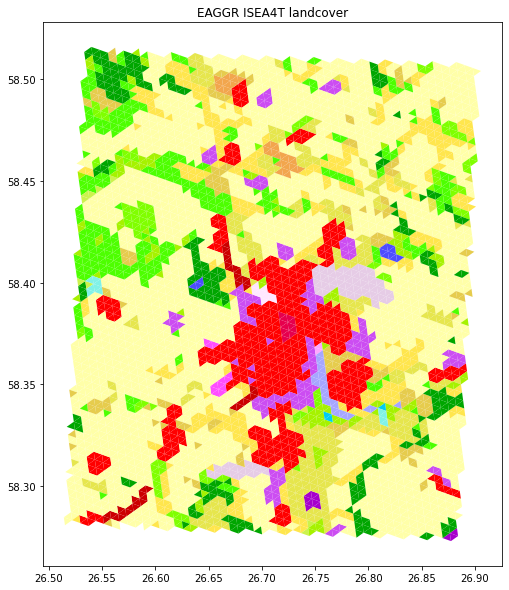

<Figure size 432x288 with 0 Axes>

In [57]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in eaggr_cor_18.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('EAGGR ISEA4T landcover')
plt.show()
plt.tight_layout()

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
for cor_class, data in eaggr_cor_17.groupby('code_18'):
    #print(cor_class)
    color = corine_legend[corine_legend['CLC_CODE']==int(cor_class)]['rgb_tuple'].values[0].tolist()
    data.plot(ax=ax,color=color)
ax.set_title('EAGGR ISEA4T landcover')
plt.show()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …